# Lesson 6: Vortex Lift

## Lift on a Cylinder

Equations for flow over a doublet:

$$\psi\left(x,y\right) = -\frac{\kappa}{2\pi}\frac{y}{x^2 + y^2}$$

$$u\left(x,y\right) = -\frac{\kappa}{2\pi}\frac{x^2 - y^2}{\left(x^2 + y^2\right)^2}$$

$$v\left(x,y\right) = -\frac{\kappa}{2\pi}\frac{2xy}{\left(x^2 + y^2\right)^2}$$

### Computing:

In [10]:
# imports and classes from resources.ipynb
%run ./resources.ipynb

In [11]:
# create mesh grid
N = 50
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)
X, Y = np.meshgrid(x, y)

In [12]:
# create doublet to represent cylinder
kappa = 1.0
x_dub, y_dub = 0.0, 0.0

cylinder = Doublet(kappa, x_dub, y_dub)

In [13]:
# freestream velocity
u_inf = 1.0

In [14]:
# calculate doublet velocity field and stream function
u_dub, v_dub = cylinder.velocity(X, Y)
psi_dub = cylinder.stream_function(X, Y)

# calculate freestream velocity field and stream function
u_fs = u_inf*np.ones(np.shape(X), dtype=float)
v_fs = np.zeros(np.shape(Y), dtype=float)
psi_fs = u_inf*Y

# superposition
u = u_dub + u_fs
v = v_dub + v_fs
psi = psi_dub + psi_fs

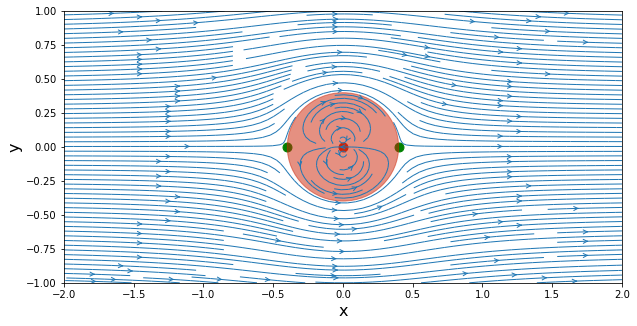

In [15]:
# plot the streamlines
size = 10
plt.figure(figsize=(size, (y_end - y_start)/(x_end - x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_dub, y_dub, color='#CD2305', s=80, marker='o')

# calculate cylinder radius and add to the figure
R = math.sqrt(kappa/(2*math.pi*u_inf))
circle = plt.Circle((x_dub, y_dub), radius=R, color='#CD2305', alpha=0.5)
plt.gca().add_patch(circle)

# calculate the stagnation points and add to figure
x_stag1, y_stag1 = +math.sqrt(kappa/(2*math.pi*u_inf)), 0
x_stag2, y_stag2 = -math.sqrt(kappa/(2*math.pi*u_inf)), 0
plt.scatter([x_stag1, x_stag2], [y_stag1, y_stag2], color='g', s=80, marker='o');

### Adding a Vortex

Vortex flow equations:

$$\psi\left(x,y\right) = \frac{\Gamma}{4\pi}\ln{\left(x^2 + y^2\right)}$$

$$u\left(x,y\right) = \frac{\Gamma}{2\pi}\frac{y}{x^2 + y^2}\text{,}\quad v\left(x,y\right) = -\frac{\Gamma}{2\pi}\frac{x}{x^2 + y^2}$$

In [16]:
# create vortex
gamma = 4.0
x_vort, y_vort = x_dub, y_dub
vort = Vortex(gamma, x_vort, y_vort)

In [17]:
# calculate velocity field and stream function
u_vort, v_vort = vort.velocity(X, Y)
psi_vort = vort.stream_function(X, Y)

# superposition
u += u_vort
v += v_vort
psi += psi_vort

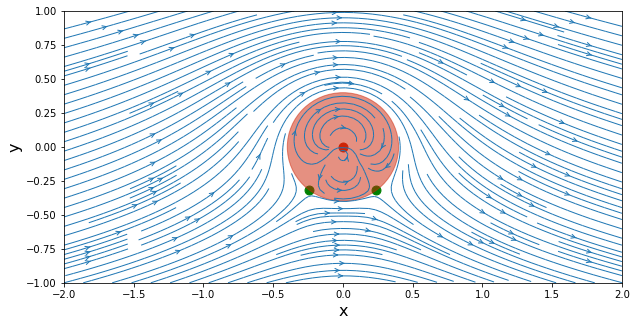

In [18]:
# calculate the stagnation points
x_stag1, y_stag1 = +math.sqrt(R**2-(gamma/(4*math.pi*u_inf))**2), -gamma/(4*math.pi*u_inf)
x_stag2, y_stag2 = -math.sqrt(R**2-(gamma/(4*math.pi*u_inf))**2), -gamma/(4*math.pi*u_inf)

# plot the streamlines
size = 10
plt.figure(figsize=(size, (y_end - y_start)/(x_end - x_start)*size))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.scatter(x_dub, y_dub, color='#CD2305', s=80, marker='o')
circle = plt.Circle((x_dub, y_dub), radius=R, color='#CD2305', alpha=0.5)
plt.gca().add_patch(circle)
plt.scatter([x_stag1, x_stag2], [y_stag1, y_stag2], color='g', s=80, marker='o');

### Challenge Task

radius of a doublet:

$$R = \sqrt{\frac{\kappa}{2\pi U_{\infty}}}$$

Find where the stagnation points are on the surface of the cylinder:

$$U_{\text{stag}} = {u_r}^2 + {u_\theta}^2 = 0$$

$$u_r\left(R,\theta_c\right) = U_\infty\cos{\theta_c}\left(1 - \frac{R^2}{R^2}\right) = 0$$

$$\Rightarrow u_\theta\left(R,\theta_c\right) = 0$$

$$\Rightarrow 2U_\infty\sin{\theta_c} = -\frac{\Gamma}{2\pi R}$$

$$\Rightarrow \sin{\theta_c} = -\frac{\Gamma}{4\pi U_\infty R}$$

$$y_{\text{stag}} = R\sin{\theta_c} = -\frac{\Gamma}{4\pi U_\infty}$$

$$x_{\text{stag}} = R\cos{\theta_c} = \sqrt{R^2\left(1 - \frac{\Gamma^2}{16\pi^2 {U_\infty}^2 R^2}\right)} = \sqrt{R^2 - \left(\frac{\Gamma}{4\pi U_\infty}\right)^2}$$

If $\frac{\Gamma}{4\pi U_\infty R} > 1$, a domain error occurs and the stagnation points cannot be calculated.

## Pressure Coefficient

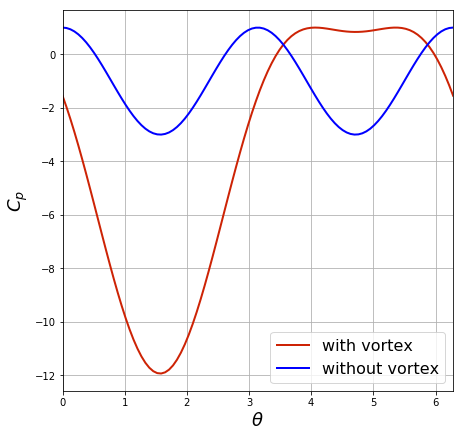

In [19]:
# calculate the surface tangential velocity
theta = np.linspace(0, 2*math.pi, 100)
u_theta = -2*u_inf*np.sin(theta) - gamma/(2*math.pi*R)

# compute the surface pressure cofficient
cp = 1.0 - (u_theta/u_inf)**2

# with no vortex
u_theta_no_vort = -2*u_inf*np.sin(theta)
cp_no_vort = 1.0 - (u_theta_no_vort/u_inf)**2

# plot
size = 7
plt.figure(figsize=(size,size))
plt.grid(True)
plt.xlabel(r'$\theta$', fontsize=18)
plt.ylabel('$C_p$', fontsize=18)
plt.xlim(theta.min(), theta.max())
plt.plot(theta, cp, label='with vortex', color='#CD2305', linewidth=2, linestyle='-')
plt.plot(theta, cp_no_vort, label='without vortex', color='b', linewidth=2, linestyle='-')
plt.legend(loc='best', prop={'size':16});

## Lift and Drag

$$D = -\int_0^{2\pi} p \ \cos{\theta} \ R \ d\theta$$

$$L = -\int_0^{2\pi} p \ \sin{\theta \ R \ d\theta}$$

### Challenge Task

Using Bernoulli's equation, replace $p$ in the equations above to obtain the lift and drag.

## The Magnus Effect

The force experienced by a rotating cylinder (or sphere, or any object) is known as the *Magnus effect*.